<a href="https://colab.research.google.com/github/Uemerson/simulated-annealing/blob/main/simulated_annealing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implementação do algoritmo recozimento simulado "simulated annealing" para maximizar o resultado da seguinte equação matemática

$$g(x) = {2} ^ {{-2}(\frac{x-0.1}{0.9})^{2}}{(\sin(5 \pi x)) ^ 6} $$

Importando bibliotecas necessárias.

In [1]:
import math
import random
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

A função de custo é onde a avaliação do algoritmo acontece. Neste algoritmo a função de custo é dada simplesmente pelo resultado da equação que deve ser maximizado.

In [2]:
def cost_function (x):
  cost = 2 ** -2 * (x - 0.1 / 0.9) ** 2 * (math.sin(5 * math.pi * x)) ** 6
  return cost

Esse função tem como objetivo realizar a perturbação no valor inicial, pode se um valor constante ou alguma outra formula, como por exemplo a gaussiana.

In [3]:
def disturb (x, learning):
  neighbors = []
  learning = learning / 10 if learning >= 10 else 1
  constant = 0.005 / learning

  upper_neighbor = x + constant if x + constant < 1 else x
  lower_neighbor = x - constant if x - constant > 0 else x

  neighbors.append(upper_neighbor)
  neighbors.append(lower_neighbor)

  return neighbors

Função para plotar os resultados.

In [4]:
def plot_results(results):
    t = np.arange(0.0, len(results), 1)
    
    plt.figure(figsize=(12,8))
    plt.plot(t, results)
    plt.show()

Função para printar os resultados.

In [5]:
def report (old_value, new_value):
  print(f'old value: {old_value}')
  print(f'cost of old value: {cost_function(old_value)}')
  print(f'new value: {new_value}')
  print(f'cost of new value: {cost_function(new_value)}')
  print()
  print()

Função que realiza o cálculo do algoritmo recozimento simulado.

In [6]:
def simulated_annealing(temperature = 10000.0, cooling = 0.95):
  x = random.random()
  print(f'initial value [0, 1): {x}')

  count = 1
  costs = []

  while temperature > 0.1:
    neighbors = disturb(x, count)
    current = cost_function(x)
    best_value = current 
    costs.append(current)

    for i in range(len(neighbors)):
      cost = cost_function(neighbors[i])
      probability = pow(math.e, (-cost - best_value) / temperature)

      if cost >= best_value or random.random() < probability:
        report(x, neighbors[i])

        best_value = cost
        x = neighbors[i]

    count += 1
    temperature = temperature * cooling

  return x, costs

initial value [0, 1): 0.2616853777984065
old value: 0.2616853777984065
cost of old value: 0.001777992872702159
new value: 0.2666853777984065
cost of new value: 0.002555296791501008


old value: 0.2666853777984065
cost of old value: 0.002555296791501008
new value: 0.2566853777984065
cost of new value: 0.0011688123755021085


old value: 0.2566853777984065
cost of old value: 0.0011688123755021085
new value: 0.2616853777984065
cost of new value: 0.001777992872702159


old value: 0.2616853777984065
cost of old value: 0.001777992872702159
new value: 0.2516853777984065
cost of new value: 0.0007208609075728394


old value: 0.2516853777984065
cost of old value: 0.0007208609075728394
new value: 0.2566853777984065
cost of new value: 0.0011688123755021085


old value: 0.2566853777984065
cost of old value: 0.0011688123755021085
new value: 0.2466853777984065
cost of new value: 0.00041324750686923245


old value: 0.2466853777984065
cost of old value: 0.00041324750686923245
new value: 0.25168537779840

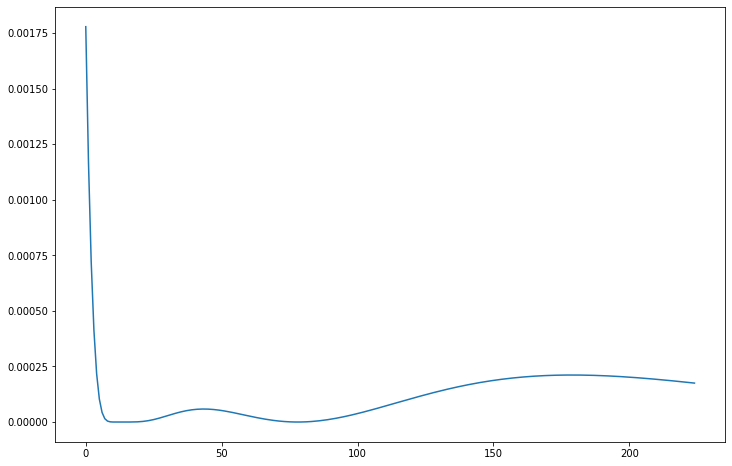

In [7]:
results = simulated_annealing()

print(f'final value [0, 1): {results[0]}')
print(f'found costs: {results[1]}')

plot_results(results[1])